#Objective

The objective of this assignment is to equip learners with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are critical steps in building efficient and accurate machine learning models. By working with the Adult dataset (predicting whether income exceeds $50K/year), students will apply scaling, encoding, feature creation, and selection methods such as Isolation Forest and Predictive Power Score (PPS) analysis.

#Introduction

Data preprocessing and feature engineering are key to building effective machine learning models. Raw datasets often have issues like missing values, categorical data, skewed distributions, or outliers that can hurt performance. Preprocessing cleans and formats the data, while feature engineering uses domain knowledge and transformations to boost the model's predictive ability.

In [ ]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Install PPS
!pip install -q ppscore --no-deps


  Preparing metadata (setup.py) ... done


In [ ]:
import ppscore as pps

In [ ]:
df = pd.read_csv("adult_with_headers.csv")
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN



### 2. Handle Missing Values
 Best practice: For categorical variables, impute with mode.
 For numerical variables, impute with median (robust to outliers).

In [ ]:
#1. Missing Values Count
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [ ]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])   # fill with most frequent
    else:
        df[col] = df[col].fillna(df[col].median())    # fill with median

print("Missing Values After Imputation")
print(df.isnull().sum())

Missing Values After Imputation
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [ ]:
# Scaling numerical features
num_features = df.select_dtypes(include=[np.number]).columns
print("Numerical Features:", num_features.tolist())

Numerical Features: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [ ]:
# Standard Scaling
scaler_standard = StandardScaler()
df_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(df[num_features]), columns=num_features)

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df[num_features]), columns=num_features)

print("Standard Scaled Data (first 5 rows)\n")
display(df_standard_scaled.head())

print("\nMin-Max Scaled Data (first 5 rows)\n")
display(df_minmax_scaled.head())

Standard Scaled Data (first 5 rows)



,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429



Min-Max Scaled Data (first 5 rows)



,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


Why Standard Scaling:

* Centers features by removing the mean and scaling to unit variance.
* Preferred when features are normally distributed or when algorithms assume Gaussian distribution
      (e.g., Logistic Regression, Linear Regression, PCA).
Why Min-Max Scaling:
* Scales values to a fixed range (default [0, 1]).
* Preferred when data does not follow a normal distribution,and when algorithms rely on bounded input features (e.g., Neural Networks, KNN, Gradient Descent-based methods).
"""

## Task 2: Encoding Techniques


Categorical features need to be converted into numeric values:

* One-Hot Encoding (for ≤ 5 categories): Expands into binary columns, no ordinal assumptions.

* Label Encoding (for > 5 categories): Converts categories into integer codes, compact but may introduce artificial order.

In [ ]:
# 1. Identify categorical features
cat_features = df.select_dtypes(include=["object"]).columns
print("Categorical Features:", cat_features.tolist())

# Separate features by unique category count
onehot_features = [col for col in cat_features if df[col].nunique() <= 5]
label_features  = [col for col in cat_features if df[col].nunique() > 5]

print("\nFeatures for One-Hot Encoding:", onehot_features)
print("Features for Label Encoding:", label_features)


Categorical Features: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']

Features for One-Hot Encoding: ['race', 'sex', 'income']
Features for Label Encoding: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']


##Pros and Cons of One-Hot Encoding and Label Encoding.
One-hot encoding is best for low-cardinality categorical variables (e.g., 5–10 categories), as it avoids assuming any ordinal relationship but increases dimensionality, which can challenge distance-based models. Label encoding is compact, using a single column, and suits high-cardinality features in tree-based models like Random Forest or XGBoost, but it risks implying false order in linear models. For high-cardinality data, consider target or frequency encoding, and always validate with cross-validation to prevent data leakage.

In [ ]:
# 2. One-Hot Encoding (for low-cardinality features)
df_encoded = pd.get_dummies(df, columns=onehot_features, drop_first=True)

In [ ]:
# Label Encoding
label_encoders = {}
for col in label_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\nEncoded Data (first 5 rows)")
display(df_encoded.head())



Encoded Data (first 5 rows)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
0,39,7,77516,9,13,4,1,1,2174,0,40,39,False,False,False,True,True,False
1,50,6,83311,9,13,2,4,0,0,0,13,39,False,False,False,True,True,False
2,38,4,215646,11,9,0,6,1,0,0,40,39,False,False,False,True,True,False
3,53,4,234721,1,7,2,6,0,0,0,40,39,False,True,False,False,True,False
4,28,4,338409,9,13,2,10,5,0,0,40,5,False,True,False,False,False,False


##Task 3. Feature Engineering

We add new features and apply a log transformation to handle skewness.

* New Feature 1: net_capital = capital-gain – capital-loss. Summarizes investment gain/loss into a single number.

* New Feature 2: age_bucket = bins of ages (<=25, 26–40, 41–60, 60+). Captures non-linear age effects.

*  Transformation: log1p(net_capital) reduces skewness, making the distribution more model-friendly.

In [ ]:
# Feature 1: Net Capital (capital-gain - capital-loss)
if "capital-gain" in df_encoded.columns and "capital-loss" in df_encoded.columns:
    df_encoded["net_capital"] = df_encoded["capital-gain"] - df_encoded["capital-loss"]
else:
    df_encoded["net_capital"] = 0

# Feature 2: Age Buckets
if "age" in df_encoded.columns:
    bins = [0, 25, 40, 60, 120]
    labels = ["<=25", "26-40", "41-60", "60+"]
    df_encoded["age_bucket"] = pd.cut(df_encoded["age"], bins=bins, labels=labels, include_lowest=True)
    df_encoded["age_bucket_code"] = df_encoded["age_bucket"].cat.codes
else:
    df_encoded["age_bucket_code"] = 0

##Rationalize Feature engineering

net_capital combines gains and losses into a single, clearer measure of net investment effect, reducing sparsity and improving interpretability. age_bucket groups ages into life-stage bins so the model can capture non-linear income patterns across career stages without forcing a single global trend.

In [ ]:
#Log Transformation on skewed feature (net_capital)
df_encoded["net_capital_log1p"] = np.log1p(df_encoded["net_capital"].clip(lower=0))

print("\nFeature Engineering Done")
display(df_encoded[["age", "age_bucket", "age_bucket_code", "net_capital", "net_capital_log1p"]].head())



Feature Engineering Done


,age,age_bucket,age_bucket_code,net_capital,net_capital_log1p
0,39,26-40,1,0,0.0
1,50,41-60,2,0,0.0
2,38,26-40,1,0,0.0
3,53,41-60,2,0,0.0
4,28,26-40,1,0,0.0


##Log transform justification

We apply a log transform to reduce skewness in net_capital since most values are small but a few are extremely large. This makes the distribution smoother and prevents extreme cases from dominating the model.

## Task 4. Feature Selection

We reduce noise by removing outliers and analyzing feature relevance.

* Isolation Forest: Detects anomalies by isolating observations. Outliers can distort model training and degrade accuracy.

* PPS (Predictive Power Score): Captures non-linear predictive power (unlike correlation, which only measures linearity).

In [ ]:
#Outlier Detection with Isolation Forest
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns
iso = IsolationForest(n_estimators=200, contamination=0.02, random_state=42)
iso.fit(df_encoded[numeric_cols])
outlier_pred = iso.predict(df_encoded[numeric_cols])  # -1 = outlier
df_encoded["is_outlier"] = (outlier_pred == -1)

print("Outliers detected:", df_encoded["is_outlier"].sum())

Outliers detected: 652


In [ ]:
# Remove outliers
df_no_outliers = df_encoded[~df_encoded["is_outlier"]].reset_index(drop=True)
print("Data shape before:", df_encoded.shape, "after removing outliers:", df_no_outliers.shape)


Data shape before: (32561, 23) after removing outliers: (31909, 23)


##Outliers & Isolation Forest

Outliers can pull regression lines, distort distances, and cause unstable gradients, so they often hurt generalization; Isolation Forest flags anomalies by isolating points and is a quick way to remove or inspect them. Always review flagged rows before deleting — sometimes rare values are valid signals — and compare model metrics with and without outlier removal.

## PPS Analysis

In [ ]:
# Detect target column (income >50K/<=50K)
target_col = "income" if "income" in df_no_outliers.columns else None
if target_col is None:
    # Try to create binary target from original dataset
    if "income" in df.columns:
        df_no_outliers["income"] = df["income"].map(lambda x: 1 if ">50" in str(x) else 0)
        target_col = "income"

print("Target column for PPS:", target_col)

Target column for PPS: income


In [ ]:
# PPS Matrix
pps_matrix = pps.matrix(df_no_outliers)
pps_target = pps_matrix[(pps_matrix["x"] == target_col) | (pps_matrix["y"] == target_col)].sort_values("ppscore", ascending=False)

print("\nPPS Scores with Target")
display(pps_target.head(15))


PPS Scores with Target


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
575,income,income,1.000000e+00,predict_itself,True,None,0.000000,1.000000,None
566,income,race_ Other,1.851557e-06,classification,True,weighted F1,0.983530,0.983530,DecisionTreeClassifier()
564,income,race_ Asian-Pac-Islander,7.644620e-07,classification,True,weighted F1,0.959090,0.959090,DecisionTreeClassifier()
565,income,race_ Black,2.316975e-07,classification,True,weighted F1,0.848296,0.848296,DecisionTreeClassifier()
567,income,race_ White,1.726823e-07,classification,True,weighted F1,0.780232,0.780232,DecisionTreeClassifier()
47,workclass,income,0.000000e+00,regression,True,mean absolute error,0.253400,0.378627,DecisionTreeRegressor()
23,age,income,0.000000e+00,regression,True,mean absolute error,0.253400,0.379628,DecisionTreeRegressor()
191,relationship,income,0.000000e+00,regression,True,mean absolute error,0.253400,0.378009,DecisionTreeRegressor()
215,capital_gain,income,0.000000e+00,regression,True,mean absolute error,0.253400,0.379411,DecisionTreeRegressor()
239,capital_loss,income,0.000000e+00,regression,True,mean absolute error,0.253400,0.379365,DecisionTreeRegressor()


##Comparision between PPS and Pearson Correlation

Pearson correlation only shows linear links, while PPS (Predictive Power Score) measures actual predictive usefulness including non-linear and asymmetric relationships. Use correlation for a quick linear sanity check and PPS to find features that truly help predict the target; features with low correlation but high PPS are worth keeping.

Correlation only shows linear relationships, while PPS also captures non-linear predictive power. For example, age may not correlate strongly with income linearly, but PPS can reveal its non-linear influence. Using both gives a fuller picture of feature importance.

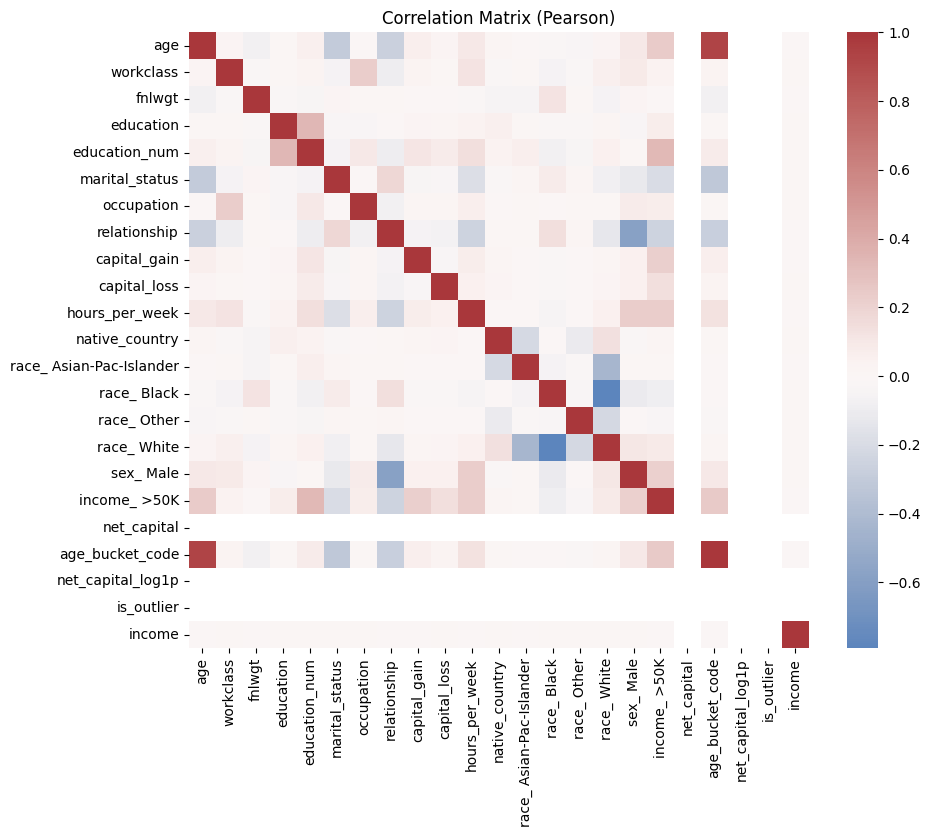

In [ ]:
# Correlation Matrix
# Drop the non-numeric 'age_bucket' column before calculating the correlation
corr = df_no_outliers.drop('age_bucket', axis=1).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap="vlag", center=0)
plt.title("Correlation Matrix (Pearson)")
plt.show()

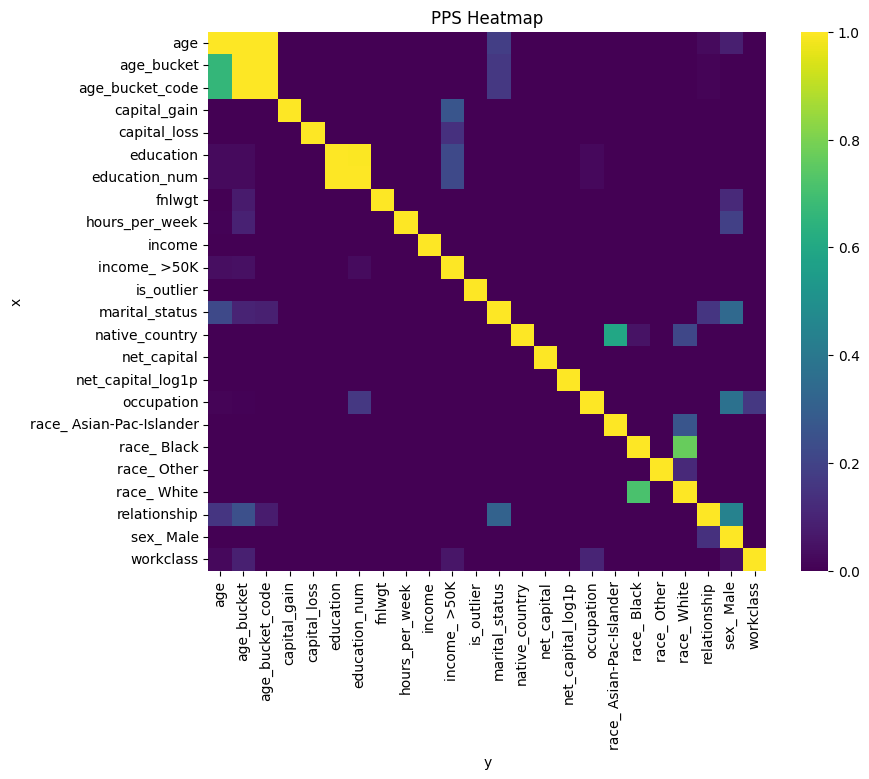

In [ ]:
# PPS Heatmap
pps_pivot = pps_matrix.pivot(index="x", columns="y", values="ppscore")
plt.figure(figsize=(9,7))
sns.heatmap(pps_pivot.fillna(0), cmap="viridis")
plt.title("PPS Heatmap")
plt.show()

Scaling ensures fair comparison across features.

Encoding converts categorical variables into numeric form without losing information.

Feature Engineering adds domain knowledge to improve model performance.

Feature Selection (outlier removal + PPS) keeps only useful and reliable data, improving efficiency and accuracy.

#Conclusion

This assignment demonstrated the importance of preprocessing and feature engineering in preparing data for machine learning. Through systematic handling of missing values, scaling, encoding, and feature transformations, the dataset was transformed into a more suitable form for modeling. Outlier removal and PPS analysis further ensured that only meaningful and reliable features were considered.